In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000,'display.max_rows',None, 'display.max_columns',None)

# Plot options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style = 'whitegrid')


In [2]:
loans = pd.read_csv('loans_clean.csv')

**Train, test split**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
'''
train, test = train_test_split(loans, test_size=0.2, random_state=101)

print(train.shape)
print(test.shape)

train = train[(train['dti'] <=50)  & (train['open_acc'] <= 40) 
& (train['total_acc'] <= 80) & (train['revol_util'] <= 120)]

X_train = train.drop('loan_status', axis =1)
y_train = train['loan_status']

X_test = test.drop('loan_status', axis =1)
y_test = test['loan_status']

'''

"\ntrain, test = train_test_split(loans, test_size=0.2, random_state=101)\n\nprint(train.shape)\nprint(test.shape)\n\ntrain = train[(train['dti'] <=50)  & (train['open_acc'] <= 40) \n& (train['total_acc'] <= 80) & (train['revol_util'] <= 120)]\n\nX_train = train.drop('loan_status', axis =1)\ny_train = train['loan_status']\n\nX_test = test.drop('loan_status', axis =1)\ny_test = test['loan_status']\n\n"

In [6]:
X = loans.drop('loan_status', axis =1)
y = loans['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

'''
# create train, test, validation data sets
X_train, X_test, y_train, y_test = train_test_split(
        X, y,stratify=y, test_size=0.4)

X_test, X_val, y_test, y_val = train_test_split(
        X_test, y_test, stratify=y_test, test_size=0.5)
'''

'\n# create train, test, validation data sets\nX_train, X_test, y_train, y_test = train_test_split(\n        X, y,stratify=y, test_size=0.4)\n\nX_test, X_val, y_test, y_val = train_test_split(\n        X_test, y_test, stratify=y_test, test_size=0.5)\n'

In [7]:
print(X_train.shape)

(1070035, 69)


**Remove outliers from the training set**

In [8]:
X_train = X_train[(X_train['dti'] <=50)  & (X_train['open_acc'] <= 40) 
& (X_train['total_acc'] <= 80) & (X_train['revol_util'] <= 120)]

y_train = y_train[X_train.index]

In [9]:
print(X_train.shape)
print(y_train.shape)

(1065967, 69)
(1065967,)


**Normalizing data**

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Setting a baseline

In this classification problem, the rate of loans that paid off (most frequent class) can be used as a baseline to evaluate the quality of models generated. These models should outperform the baseline capabilities to be considered for future predictions.

In [12]:
baseline = loans['loan_status'].value_counts(normalize=True)[0]
baseline

0.8002547953562649

### Accessing multiple algorithms



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Considering that we have millions of rows of data, it will take a lot of time to run a model; so we first filter 10 percent of the original data to select the model among multiple models and tune its parameter; then we use 80 percent of the data to train the selected model and the remaining 20 percent to evaluate the selected model performance

In [14]:
# we use 5% of data to select models
x_train_frac, x_test_frac, y_train_frac, y_test_frac = train_test_split(X, y, test_size=0.95, random_state=101, stratify = y)

# filter the outliers
x_train_frac = x_train_frac[(x_train_frac['dti'] <=50)  & (x_train_frac['open_acc'] <= 40) 
& (x_train_frac['total_acc'] <= 80) & (x_train_frac['revol_util'] <= 120)]

y_train_frac = y_train_frac[x_train_frac.index]

# normalize the data
scaler = MinMaxScaler()
x_train_frac = scaler.fit_transform(x_train_frac)

print(x_train_frac.shape)

(66593, 69)


DT: 0.6245152533521657 (0.01571438034956664)
RandomForest: 0.6316929897309836 (0.01018840679578801)
AdaBoost: 0.8022715191539339 (0.0012125527728103008)
GradientBoost: 0.802431706372238 (0.0015470885124888051)
KNN: 0.7736049121655069 (0.0036695422814633253)
XGBoost: 0.7991180848967306 (0.003017796305906953)


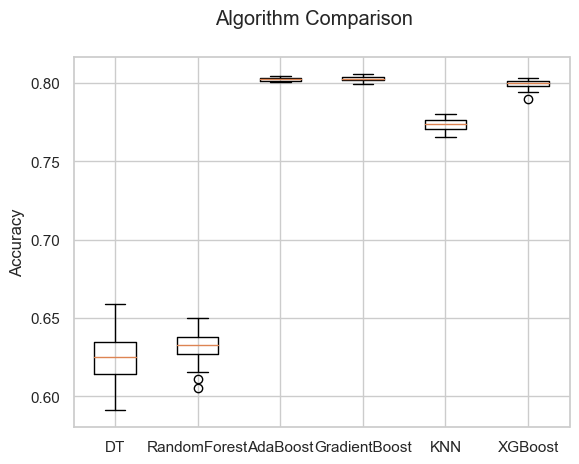

In [15]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

DT = DecisionTreeClassifier(criterion='gini', random_state=101, max_depth=5, class_weight='balanced',min_samples_leaf=5)
RF = RandomForestClassifier(criterion='gini', random_state=101, max_depth=5, class_weight='balanced',min_samples_leaf=5, n_estimators=20)
#Bagged = BaggingClassifier(n_estimators=50)
AdaBoost = AdaBoostClassifier(n_estimators=50)
Gboost = GradientBoostingClassifier(n_estimators=50)
KNN = KNeighborsClassifier()
#LR = LogisticRegression(random_state=101)
XGBC = XGBClassifier()

models = []

models.append(('DT',DT))
models.append(('RandomForest',RF))
#models.append(('Bagged',Bagged))
models.append(('AdaBoost',AdaBoost))
models.append(('GradientBoost',Gboost))
models.append(('KNN',KNN))
#models.append(('LogisticRegression',LR))
models.append(('XGBoost',XGBC))

# evaluating each model in turn using KFold CV with 3 splits
results = []
names = []
for name, model in models:
    #kfold = model_selection.KFold(shuffle = True, n_splits =3, random_state = 101)
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
    #cv_results = model_selection.cross_val_score(model,X_train,y_train, cv = kfold, scoring='f1_micro')
    cv_results = model_selection.cross_val_score(model,x_train_frac,y_train_frac, cv = kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('{}: {} ({})'.format(name, np.mean(cv_results), np.std(cv_results, ddof=1)))

# boxplot algorithm comparison
fig = plt.figure()
sns.set_style('whitegrid')
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation = 'horizontal')
#plt.ylabel('Weighted F1 Score')
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
plt.show()

From the above figure, we can say that AdaBoost and GradientBoost classifier are the two most favorable model within 6 models with the highest mean of acuuracy scores and lowest variance. (However, the accuracy is only slightly above the baseline accuracy.) In the next section, we will do hyperparameter turning on those models.



### Hyperparameter tuning of selected model

In [87]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

**Gradient Boosting**

In [19]:
param_grid = dict(
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 150, num =8)],
# Number of features to consider at every split
#max_features = ['auto', 'sqrt'],
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3,10, num=8)],
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2,5, num=4)],
# Minimum number of samples required at each leaf node
#min_samples_leaf = [int(x) for x in np.linspace(1,10, num=10)]
)

# Random search of parameters using 3 fold cross validation, search across 100 different combinations and use all avilable cores
gb_random = RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions =param_grid, n_iter =100, cv=3, verbose = 2, random_state = 42, n_jobs = -1 )

# Fit the random search mode
gb_random.fit(x_train_frac, y_train_frac)

# Print the best parameters
print(gb_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END .max_depth=3, min_samples_split=2, n_estimators=140; total time=  55.3s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=140; total time=  55.4s
[CV] END .max_depth=3, min_samples_split=2, n_estimators=140; total time=  55.9s
[CV] END .max_depth=5, min_samples_split=3, n_estimators=150; total time= 1.6min
[CV] END .max_depth=5, min_samples_split=3, n_estimators=150; total time= 1.6min
[CV] END .max_depth=5, min_samples_split=3, n_estimators=150; total time= 1.6min
[CV] END max_depth=10, min_samples_split=2, n_estimators=120; total time= 2.5min
[CV] END max_depth=10, min_samples_split=2, n_estimators=120; total time= 2.6min
[CV] END max_depth=10, min_samples_split=2, n_estimators=120; total time= 2.6min
[CV] END .max_depth=6, min_samples_split=4, n_estimators=130; total time= 1.7min
[CV] END .max_depth=9, min_samples_split=3, n_estimators=140; total time= 2.6min
[CV] END .max_depth=9, min_samples_split=3, n_

In [27]:
gb_best_random = gb_random.best_estimator_
predictions = gb_best_random.predict(x_train_frac)
accuracy = accuracy_score(y_train_frac, predictions)
print('Gradient Boosting Accuracy: {}'.format(accuracy))

y_score = gb_random.predict_proba(x_train_frac)[:,1]
roc = roc_auc_score(y_train_frac, y_score)
print('Gradient Boosting ROC AUC Score: {}'.format(roc))


Gradient Boosting Accuracy: 0.8076975057438469
Gradient Boosting ROC AUC Score: 0.7250923531758318


In [29]:
print(gb_random.best_params_)

{'n_estimators': 150, 'min_samples_split': 3, 'max_depth': 3}


After fitting the grid object, the best hyperparameters of gradient boosting are {'n_estimators': 150, 'min_samples_split': 3, 'max_depth': 3}. Next step, we will retrain the model using the best hyperparameters and the whole training data.

In [31]:
gb_best_random.fit(X_train, y_train)
predictions = gb_best_random.predict(X_train)
accuracy = accuracy_score(y_train, predictions)
print('Gradient Boosting Accuracy: {}'.format(accuracy))

y_score = gb_random.predict_proba(X_train)[:,1]
roc = roc_auc_score(y_train, y_score)
print('Gradient Boosting ROC AUC Score: {}'.format(roc))


Gradient Boosting Accuracy: 0.8036824779753969
Gradient Boosting ROC AUC Score: 0.7149643528069122


Accuracy Score:  0.803105689902022
ROC_AUC Score:  0.7111488017115096
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    214075
           1       0.56      0.07      0.12     53434

    accuracy                           0.80    267509
   macro avg       0.68      0.53      0.50    267509
weighted avg       0.76      0.80      0.74    267509



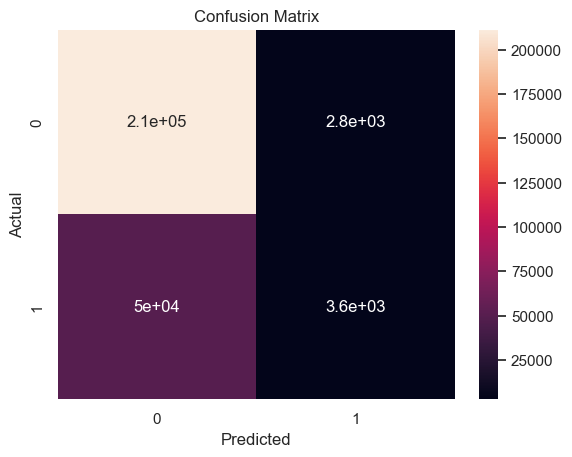

In [37]:
final_model = gb_best_random
final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, predictions))
y_score = gb_best_random.predict_proba(X_test)[:,1]
print('ROC_AUC Score: ', roc_auc_score(y_test, y_score))


# Checking classification report
print('Classification Report')
print(classification_report(y_test, predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Model performs poorly on minority class, might because the max_depth we search is low. Next step, we will search for a broad range of max_depth

In [59]:
param_grid = dict(
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 150, num =8)],
# Number of features to consider at every split
#max_features = ['auto', 'sqrt'],
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,2000, num=20)],
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2,5, num=4)],
# Minimum number of samples required at each leaf node
#min_samples_leaf = [int(x) for x in np.linspace(1,10, num=10)]
)

# Random search of parameters using 3 fold cross validation, search across 100 different combinations and use all avilable cores
gb_random = RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions =param_grid, n_iter =100, cv=3, verbose = 2, random_state = 42, n_jobs = -1 )

# Fit the random search mode
gb_random.fit(x_train_frac, y_train_frac)

# Print the best parameters
print(gb_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=952, min_samples_split=2, n_estimators=110; total time= 5.0min
[CV] END max_depth=952, min_samples_split=2, n_estimators=110; total time= 5.2min
[CV] END max_depth=847, min_samples_split=3, n_estimators=90; total time= 5.4min
[CV] END max_depth=847, min_samples_split=3, n_estimators=90; total time= 5.5min
[CV] END max_depth=847, min_samples_split=3, n_estimators=90; total time= 5.7min
[CV] END max_depth=1790, min_samples_split=5, n_estimators=100; total time= 8.4min
[CV] END max_depth=1790, min_samples_split=5, n_estimators=100; total time= 8.6min
[CV] END max_depth=1790, min_samples_split=5, n_estimators=100; total time= 8.6min
[CV] END max_depth=952, min_samples_split=2, n_estimators=110; total time= 5.3min
[CV] END max_depth=533, min_samples_split=3, n_estimators=140; total time= 9.2min
[CV] END max_depth=1895, min_samples_split=4, n_estimators=130; total time=11.7min
[CV] END max_depth=1895, min_sampl

In [60]:
gb_best_random = gb_random.best_estimator_
predictions = gb_best_random.predict(x_train_frac)
accuracy = accuracy_score(y_train_frac, predictions)
print('Gradient Boosting Accuracy(train frac): {}'.format(accuracy))

y_score = gb_random.predict_proba(x_train_frac)[:,1]
roc = roc_auc_score(y_train_frac, y_score)
print('Gradient Boosting ROC AUC Score(train frac): {}'.format(roc))

Gradient Boosting Accuracy: 0.8827354226420194
Gradient Boosting ROC AUC Score: 0.9403405993347381


Accuracy Score(test):  0.803277646733381
ROC_AUC Score:  0.7167114097424306
Accuracy Score(test):  0.8180525288306298
ROC_AUC Score:  0.7732091998562008
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89    214075
           1       0.55      0.09      0.15     53434

    accuracy                           0.80    267509
   macro avg       0.68      0.54      0.52    267509
weighted avg       0.76      0.80      0.74    267509



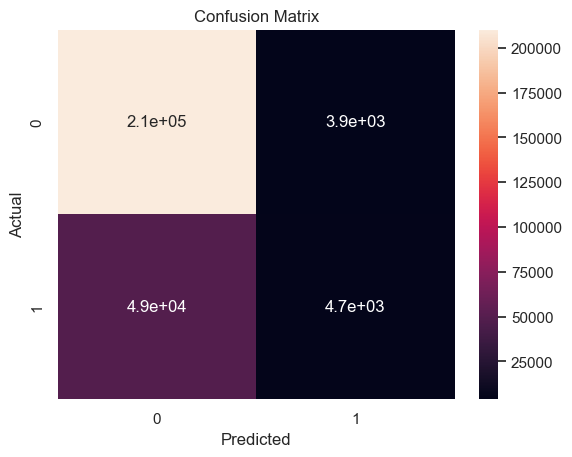

In [ ]:
final_model = gb_best_random
final_model.fit(X_train, y_train)
predictions_test = final_model.predict(X_test)
print('Accuracy Score(test): ', accuracy_score(y_test, predictions_test))
y_score_test = gb_best_random.predict_proba(X_test)[:,1]
print('ROC_AUC Score: ', roc_auc_score(y_test, y_score_test))
print('================================================')
predictions_train = final_model.predict(X_train)
print('Accuracy Score(train): ', accuracy_score(y_train, predictions_train))
y_score_train = gb_best_random.predict_proba(X_train)[:,1]
print('ROC_AUC Score: ', roc_auc_score(y_train, y_score_train))

# Checking classification report
print('Classification Report')
print(classification_report(y_test, predictions_test))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_test)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

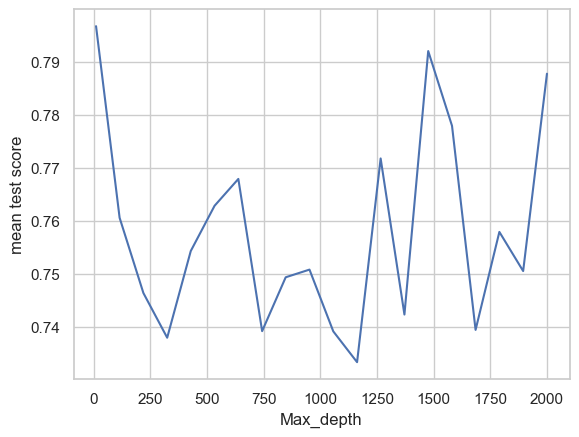

In [ ]:
df_cv_results = pd.DataFrame(gb_random.cv_results_)
max_depth_result = df_cv_results.groupby('param_max_depth')['mean_test_score'].mean().reset_index()

plt.plot(max_depth_result['param_max_depth'], max_depth_result['mean_test_score'])
plt.xlabel('Max_depth')
plt.ylabel('mean test score')
plt.show()

The test score varies greatly with different max_depth, which makes us harder to determine at which point the model is overfitted. 

**Experiment training loss with max_depth**

In [90]:
param_grid = dict(
# Number of trees in random forest
n_estimators = [100],
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,2460, num=50)],
# Minimum number of samples required to split a node
min_samples_split = [5]
)

# Random search of parameters using 3 fold cross validation, search across 100 different combinations and use all avilable cores
gb_random = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid=param_grid, cv=3, verbose = 2,  n_jobs = -1, return_train_score= True)

# Fit the random search mode
gb_random.fit(x_train_frac, y_train_frac)

# Print the best parameters
print(gb_random.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 3.3min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 3.3min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 3.3min
[CV] END max_depth=110, min_samples_split=5, n_estimators=100; total time=25.6min
[CV] END max_depth=60, min_samples_split=5, n_estimators=100; total time=25.6min
[CV] END max_depth=60, min_samples_split=5, n_estimators=100; total time=25.6min
[CV] END max_depth=60, min_samples_split=5, n_estimators=100; total time=25.6min
[CV] END max_depth=110, min_samples_split=5, n_estimators=100; total time=25.6min
[CV] END max_depth=110, min_samples_split=5, n_estimators=100; total time=26.8min


/Users/siying/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=160, min_samples_split=5, n_estimators=100; total time=26.8min
[CV] END max_depth=160, min_samples_split=5, n_estimators=100; total time=26.9min
[CV] END max_depth=160, min_samples_split=5, n_estimators=100; total time=26.7min
[CV] END max_depth=210, min_samples_split=5, n_estimators=100; total time=26.8min
[CV] END max_depth=210, min_samples_split=5, n_estimators=100; total time=26.9min
[CV] END max_depth=210, min_samples_split=5, n_estimators=100; total time=26.9min
[CV] END max_depth=260, min_samples_split=5, n_estimators=100; total time=26.8min
[CV] END max_depth=260, min_samples_split=5, n_estimators=100; total time=26.7min
[CV] END max_depth=260, min_samples_split=5, n_estimators=100; total time=26.7min
[CV] END max_depth=310, min_samples_split=5, n_estimators=100; total time=26.7min
[CV] END max_depth=310, min_samples_split=5, n_estimators=100; total time=29.4min
[CV] END max_depth=310, min_samples_split=5, n_estimators=100; total time=29.3min
[CV] END max_dep

In [95]:
gb_best_random = gb_random.best_estimator_
predictions = gb_best_random.predict(x_train_frac)
accuracy = accuracy_score(y_train_frac, predictions)
print('Gradient Boosting Accuracy(train frac): {}'.format(accuracy))

y_score = gb_random.predict_proba(x_train_frac)[:,1]
roc = roc_auc_score(y_train_frac, y_score)
print('Gradient Boosting ROC AUC Score(train frac): {}'.format(roc))

print('================================================================')
print('Classification Report')
print(classification_report(y_train_frac, predictions))

Gradient Boosting Accuracy(train frac): 0.8610900520180449
Gradient Boosting ROC AUC Score(train frac): 0.898937535825695
Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92    106647
           1       0.95      0.32      0.48     26576

    accuracy                           0.86    133223
   macro avg       0.90      0.66      0.70    133223
weighted avg       0.87      0.86      0.83    133223



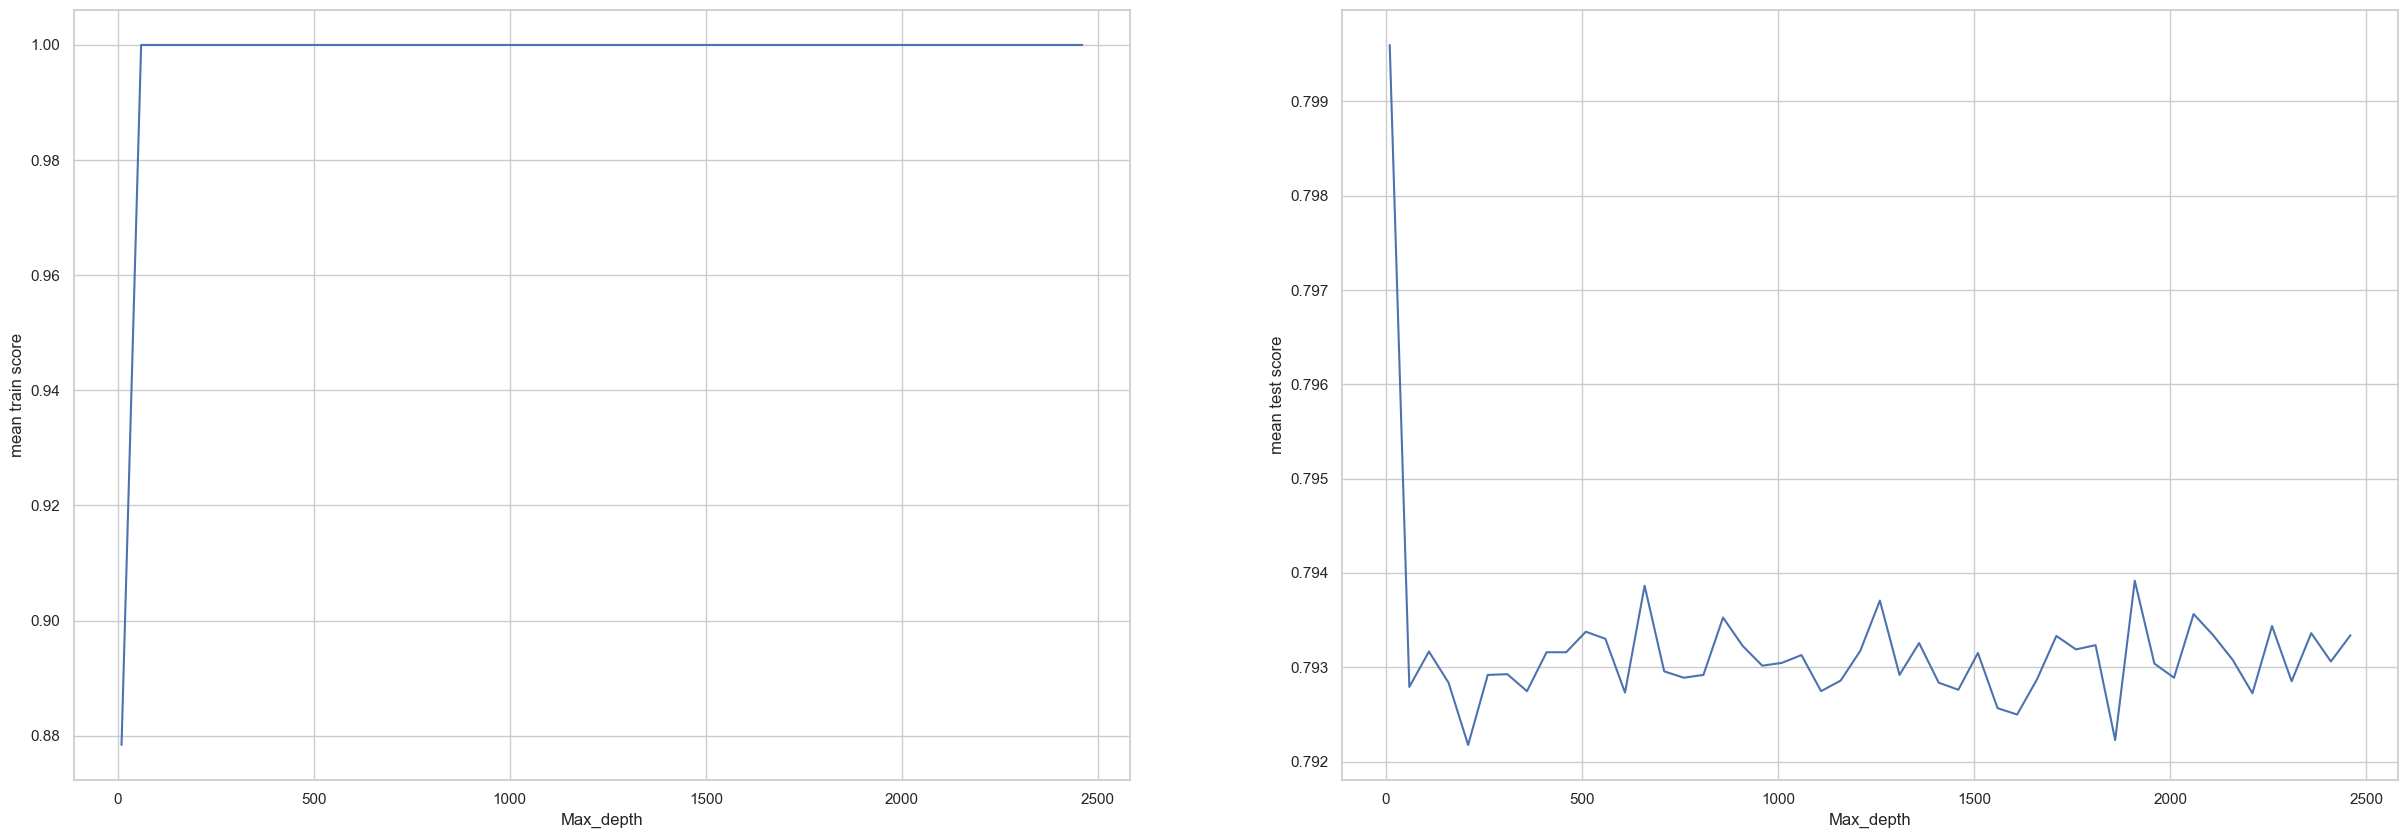

In [106]:
df_cv_results = pd.DataFrame(gb_random.cv_results_)
max_depth_testresult = df_cv_results.groupby('param_max_depth')['mean_test_score'].mean().reset_index()
max_depth_trainresult = df_cv_results.groupby('param_max_depth')['mean_train_score'].mean().reset_index()

fig,(ax0,ax1) = plt.subplots(1,2,figsize = (30,10))
ax0.plot(max_depth_trainresult['param_max_depth'], max_depth_trainresult['mean_train_score'])
ax0.set_xlabel('Max_depth')
ax0.set_ylabel('mean train score')


ax1.plot(max_depth_testresult['param_max_depth'], max_depth_testresult['mean_test_score'])
ax1.set_xlabel('Max_depth')
ax1.set_ylabel('mean test score')
plt.show()

From the plots, we can see the model overfits after max_depth greater than 10, with training score very high but testing score decreases a lot.

After increasing the depth of model, model still performs bad for minority class. Since we have a large dataset and we are interested at the monority class, reducing some information of the majority is acceptable. I decided to use undersampling to deal with imbalanced data.

In [ ]:
# we use 10% of data to select models
x_train_frac, x_test_frac, y_train_frac, y_test_frac = train_test_split(X, y, test_size=0.9, random_state=101, stratify = y)

# filter the outliers
x_train_frac = x_train_frac[(x_train_frac['dti'] <=50)  & (x_train_frac['open_acc'] <= 40) 
& (x_train_frac['total_acc'] <= 80) & (x_train_frac['revol_util'] <= 120)]

y_train_frac = y_train_frac[x_train_frac.index]

# normalize the data
scaler = MinMaxScaler()
x_train_frac = scaler.fit_transform(x_train_frac)
x_test_frac = scaler.transform(x_test_frac)
print(x_train_frac.shape)
print(x_test_frac.shape)

# undersample
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
x_train_under, y_train_under = undersample.fit_resample(x_train_frac, y_train_frac)
print(x_train_under.shape)

(53152, 69)


Based on the previous result, we tweak the parameters grid search a little bit, we expand the range od n_estimator and min_samples_split. At the same time, we set the max_depth search around 10.

In [ ]:
param_grid = dict(
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 60, stop = 180, num =8)],
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1,20, num=20)],
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(4,7, num=4)],
)

# Random search of parameters using 3 fold cross validation, search across 100 different combinations and use all avilable cores
gb_random_b = RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions =param_grid, n_iter =100, cv=3, verbose = 2, random_state = 42, n_jobs = -1, return_train_score=True)

# Fit the random search mode
gb_random_b.fit(x_train_under, y_train_under)

# Print the best parameters
print(gb_random_b.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=952, min_samples_split=2, n_estimators=110; total time= 5.0min
[CV] END max_depth=952, min_samples_split=2, n_estimators=110; total time= 5.2min
[CV] END max_depth=847, min_samples_split=3, n_estimators=90; total time= 5.4min
[CV] END max_depth=847, min_samples_split=3, n_estimators=90; total time= 5.5min
[CV] END max_depth=847, min_samples_split=3, n_estimators=90; total time= 5.7min
[CV] END max_depth=1790, min_samples_split=5, n_estimators=100; total time= 8.4min
[CV] END max_depth=1790, min_samples_split=5, n_estimators=100; total time= 8.6min
[CV] END max_depth=1790, min_samples_split=5, n_estimators=100; total time= 8.6min
[CV] END max_depth=952, min_samples_split=2, n_estimators=110; total time= 5.3min
[CV] END max_depth=533, min_samples_split=3, n_estimators=140; total time= 9.2min
[CV] END max_depth=1895, min_samples_split=4, n_estimators=130; total time=11.7min
[CV] END max_depth=1895, min_sampl

In [ ]:
gb_best_random_b = gb_random_b.best_estimator_
predictions = gb_best_random_b.predict(x_test_frac)
accuracy = accuracy_score(y_test_frac, predictions)
print('Gradient Boosting Accuracy(test frac): {}'.format(accuracy))

y_score = gb_random_b.predict_proba(x_test_frac)[:,1]
roc = roc_auc_score(y_test_frac, y_score)
print('Gradient Boosting ROC AUC Score(test frac): {}'.format(roc))

print('================================================')
print('Classification Report')
print(classification_report(y_test_frac, predictions))


Gradient Boosting Accuracy: 0.8827354226420194
Gradient Boosting ROC AUC Score: 0.9403405993347381


In [ ]:
# we use 20% of data to test model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

# filter the outliers
X_train = X_train[(X_train['dti'] <=50)  & (X_train['open_acc'] <= 40) 
& (X_train['total_acc'] <= 80) & (X_train['revol_util'] <= 120)]

y_train = y_train[X_train.index]

# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

# undersample
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print(X_train_under.shape)

Accuracy Score(test):  0.803277646733381
ROC_AUC Score:  0.7167114097424306
Accuracy Score(test):  0.8180525288306298
ROC_AUC Score:  0.7732091998562008
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89    214075
           1       0.55      0.09      0.15     53434

    accuracy                           0.80    267509
   macro avg       0.68      0.54      0.52    267509
weighted avg       0.76      0.80      0.74    267509



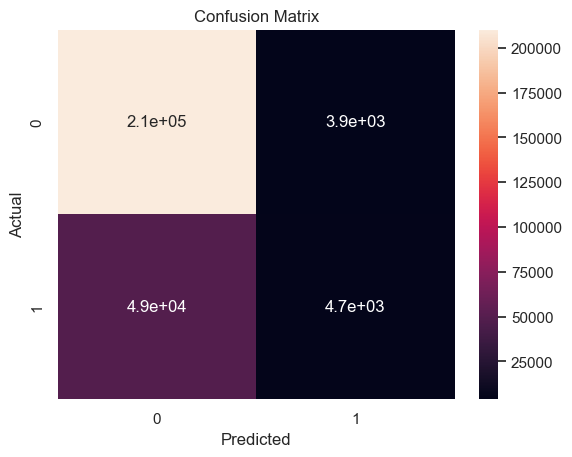

In [61]:
final_model = gb_best_random_b
final_model.fit(X_train_under, y_train_under)

# result on undersample traning data set
predictions_train_under = final_model.predict(X_train_under)
print('Accuracy Score(train undersample): ', accuracy_score(y_train_under, predictions_train_under))
y_score_train_under = final_model.predict_proba(X_train_under)[:,1]
print('ROC_AUC Score (train undersample): ', roc_auc_score(y_train_under, y_score_train_under))
print('================================================')

# result on traning data set
predictions_train = final_model.predict(X_train)
print('Accuracy Score(train): ', accuracy_score(y_train, predictions_train))
y_score_train = final_model.predict_proba(X_train)[:,1]
print('ROC_AUC Score: ', roc_auc_score(y_train, y_score_train))
print('================================================')

# result on testing data set
predictions_test = final_model.predict(X_test)
print('Accuracy Score(test): ', accuracy_score(y_test, predictions_test))
y_score_test = final_model.predict_proba(X_test)[:,1]
print('ROC_AUC Score: ', roc_auc_score(y_test, y_score_test))
print('================================================')

# Checking classification report
print('Classification Report')
print(classification_report(y_test, predictions_test))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions_test)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Summary



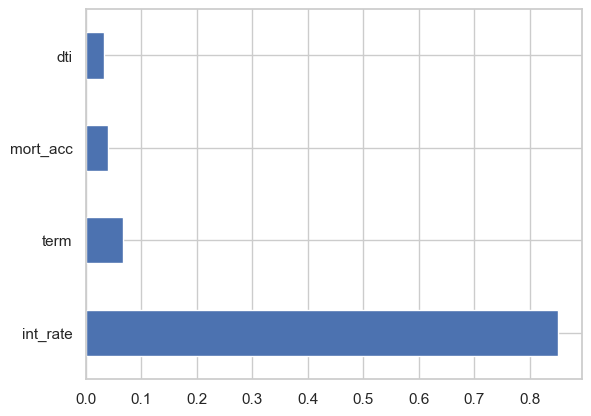

In [51]:
# Using a decision tree to find the most important features as xxx
DT = DecisionTreeClassifier(criterion='gini', random_state=101, max_depth=5, class_weight='balanced',min_samples_leaf=5)
DT.fit(X_train, y_train)
# y_pred_DT = DT.predict(X_test)

feat_importance = pd.Series(DT.feature_importances_, index = loans.drop('loan_status', axis =1).columns)
feat_importance = feat_importance.nlargest(4).sort_values(ascending=False).plot(kind = 'barh')
plt.show()

DT: 0.38904771373234104 (0.021198367578438206)
RandomForest: 0.38552975193791683 (0.006211217082006559)
Bagged: 0.20078857972682684 (0.0001756178370295855)
AdaBoost: 0.19752112384013776 (0.00023393704621467895)
GradientBoost: 0.19751080453526004 (0.00019843437740366674)


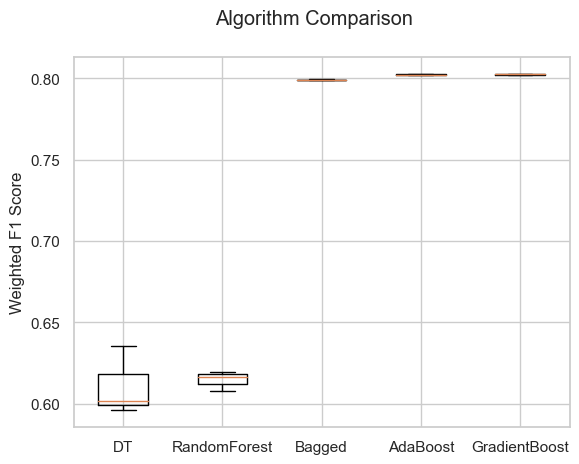

In [17]:
'''
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

DT = DecisionTreeClassifier(criterion='gini', random_state=101, max_depth=5, class_weight='balanced',min_samples_leaf=5)
RF = RandomForestClassifier(criterion='gini', random_state=101, max_depth=5, class_weight='balanced',min_samples_leaf=5, n_estimators=20)
Bagged = BaggingClassifier(n_estimators=50)
AdaBoost = AdaBoostClassifier(n_estimators=50)
Gboost = GradientBoostingClassifier(n_estimators=50)
#KNN = KNeighborsClassifiers()
#LR = LogisticRegression(random_state=101)
#SVM = SVC(random_state=101)
#XGBC = XGBClassifier()

models = []

models.append(('DT',DT))
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoost',AdaBoost))
models.append(('GradientBoost',Gboost))
#models.append(('KNN',KNN))
#models.append(('LogisticRegression',LR))
#models.append(('SVM',SVM))
#models.append(('XGBoost',XGBC))

# evaluating each model in turn using KFold CV with 3 splits
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits =3, random_state = 101)
    #kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)
    cv_results = model_selection.cross_val_score(model,X_train,y_train, cv = kfold, scoring='f1_micro')
    #cv_results = model_selection.cross_val_score(model,X_train,y_train, cv = kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('{}: {} ({})'.format(name, 1-np.mean(cv_results), np.std(cv_results, ddof=1)))

# boxplot algorithm comparison
fig = plt.figure()
sns.set_style('whitegrid')
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation = 'horizontal')
plt.ylabel('Weighted F1 Score')
ax.set_xticklabels(names)
plt.show()

'''

From the above figure, we can say that GradientBoost classifier is the most favorable model within 5 models with the highest mean of weighted F1 scores and a low variance.